<module 'matplotlib.pyplot' from 'C:\\Users\\nguye\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

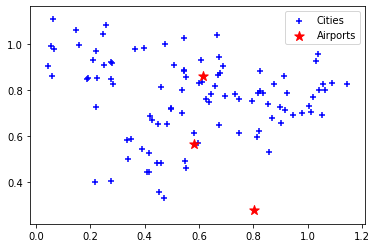

In [56]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [57]:
def distance(airport, city):
    # need distance formula for airport to a city
    return ((airport[0] - city[0])**2 + (airport[1] - city[1])**2)**0.5
    

def calcCitySets(airports, cities):
    # list of size == len(airports)
    # citySets = [[airportCities], [airport2Cities], [airport3Cities]]
    citySets = []
    for i in range(len(airports)):
        citySets.append([])
        
    for city in cities:
        closestAirportIndex = 0
        smallestDist = distance(airports[0], city)
        for i, airport in enumerate(airports[1:]):
            curr = distance(airport, city)
            if curr < smallestDist:
                closestAirportIndex = i
                smallestDist = curr
            citySets[closestAirportIndex].append(city)
    return citySets

def objfunction(state, citySets):# state
    # print(state[0])
    for airport in state:
        for city in citySets:
            print(city)
            x = (airport[0] - city[0])**2 + (airport[1] - city[1])**2
    return x

def calc_grad(airports, citySets):
    # grad = [df/dx1, df/y1, ...]
    grad = [] * len(airports) * 2
    dfdx1 = 2 * (x - x_c)
    grad.append(dfdx1)
    return grad

# update current state until either (1) # of epochs or (2) % change within threshold

def gradient_descent(airports, cities):
    # flatten airports to 1-D
    state = []
    for pair in airports:
        # append x coords
        state.append(pair[0])
        # append y coords
        state.append(pair[1])
    
    maxEpochs = 20
    delta =.0001
    percentChange = 1

    # list size 3, len(citySets) == 3
    citySets = calcCitySets(airports, cities)
    
    objValues = []
    objValues.append(objfunction(state, citySets))
    numOfEpochs = 0
    while numOfEpochs < maxEpochs:
    # for i, airport in enumerate(airports):
    #     citySets.append()
        while percentChange > delta:
            # updating state:
            # state: [x1, y1, x2, y2, x3, y3]
            # calcGrad return: [df/dx1, df/y1,...]
            
            # compute Gradient
            gradVector = calc_grad(airports)
            # move state
            alpha = .00000001
            state = state - alpha * gradVector
            
            # cal new city sets
            citySets = calcCitySets(airports, cities)
            print(state)
            # store obj func value
            objValues.append(objfunction(state, citySets))
            
            # airports = airports - delta * calc_grad(airports)
            # objValues.append(objfunction(state))
            
            current = objValues[-1]
            previous = objValues[-2]
            percentChange = abs(previous - current/ objValues[-1])
            
            numOfEpochs += 1
        
    return state, objValues

In [58]:
# plotting
import matplotlib.pyplot as plt

def plot(objValues):
    plt.scatter(objValues)

[(0.06160645696519136, 1.1066387865418956), (0.06160645696519136, 1.1066387865418956), (1.0406187221011336, 0.7976103284682735), (1.0406187221011336, 0.7976103284682735), (0.21672920328888426, 0.3984717787681955), (0.15739886260026795, 0.9935400113928786), (0.15739886260026795, 0.9935400113928786), (0.22061412820859075, 0.9689980775453261), (0.22061412820859075, 0.9689980775453261), (0.22126667464188102, 0.7240478842642675), (0.6716278831393218, 0.8642148421499662), (0.6716278831393218, 0.8642148421499662), (0.8225398454547463, 0.6216056078663519), (0.055260645885106194, 0.9907201263618075), (0.055260645885106194, 0.9907201263618075), (0.6063715764135419, 0.9308949047363551), (0.6063715764135419, 0.9308949047363551), (0.2517048621843816, 0.90893133436665), (0.2517048621843816, 0.90893133436665), (0.5387650644693791, 0.7979406712800632), (0.5387650644693791, 0.7979406712800632), (0.82530679061848, 0.794375234774454), (0.82530679061848, 0.794375234774454), (0.9180311345960277, 0.71461375

TypeError: 'float' object is not subscriptable

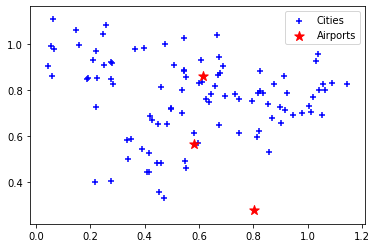

In [59]:
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

states, objValues = gradient_descent(airports, cities)

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt
